In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['music', 'applause', 'music', 'um', 'music', ...
1      ['music', 'thank', 'music', 'applause', 'music...
2      ['foreign', 'music', 'applause', 'music', 'not...
3      ['good', 'morning', 'go', 'to', 'steal', 'uten...
4      ['music', 'south', 'france', 'make', 'excited'...
                             ...                        
277    ['today', 'day', 'leave', 'trip', 'yes', 'good...
278    ['tomorrow', 'go', 'trip', 'dominican', 'repub...
279    ['good', 'morning', 'cut', 'hair', 'tuck', 'sw...
280    ['good', 'morning', 'currently', 'wake', 'toda...
281    ['hey', 'guy', 'emma', 'today', 'go', 'thrift'...
Name: transcript, Length: 282, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 8.11
Total occurrences of 'xxxx' per transcript: 2288.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
like not know: 306
know go to: 255
think go to: 241
like go to: 221
not know like: 208
go to like: 186
not know not: 174
not know go: 157
okay go to: 155
go to try: 154
like feel like: 136
probably go to: 116
know not know: 106
go to go: 96
like like like: 95
go to lie: 88
today go to: 82
like not like: 81
to go to: 75
like not want: 75


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.048*"like" + 0.033*"not" + 0.021*"know" + 0.021*"go" + 0.014*"okay" + 0.014*"to" + 0.012*"oh" + 0.010*"want" + 0.010*"right" + 0.010*"get"
Topic: 1, Words: 0.026*"music" + 0.011*"not" + 0.010*"like" + 0.008*"foreign" + 0.008*"know" + 0.007*"look" + 0.005*"photo" + 0.004*"actually" + 0.004*"david" + 0.004*"right"
Topic: 2, Words: 0.073*"like" + 0.037*"not" + 0.028*"know" + 0.017*"go" + 0.011*"okay" + 0.011*"think" + 0.011*"to" + 0.010*"good" + 0.009*"kind" + 0.008*"look"
Topic: 3, Words: 0.019*"amanda" + 0.018*"fry" + 0.014*"uh" + 0.014*"emma" + 0.009*"yo" + 0.007*"wendys" + 0.006*"yeah" + 0.005*"chickfila" + 0.005*"alright" + 0.005*"mcdonald"
Topic: 4, Words: 0.065*"like" + 0.032*"not" + 0.028*"go" + 0.020*"know" + 0.018*"to" + 0.013*"okay" + 0.012*"good" + 0.012*"xxxx" + 0.011*"oh" + 0.011*"think"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
xxxx: 26.332007580757598
music: 14.102860022733692
coffee: 12.469524423348867
video: 9.561000850719333
wear: 9.402278005420253
eat: 9.04063016416169
um: 8.632648696181159
outfit: 7.752552094567262
wait: 7.1703667429815425
maybe: 6.917504011195274


In [14]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('like', 19958), ('not', 10273), ('go', 7479), ('know', 6944), ('to', 4700), ('okay', 3941), ('good', 3437), ('think', 3256), ('oh', 3227), ('look', 2756), ('want', 2714), ('right', 2472), ('little', 2443), ('get', 2385), ('kind', 2368)]
      Word  Frequency
0     like      19958
1      not      10273
2       go       7479
3     know       6944
4       to       4700
5     okay       3941
6     good       3437
7    think       3256
8       oh       3227
9     look       2756
10    want       2714
11   right       2472
12  little       2443
13     get       2385
14    kind       2368


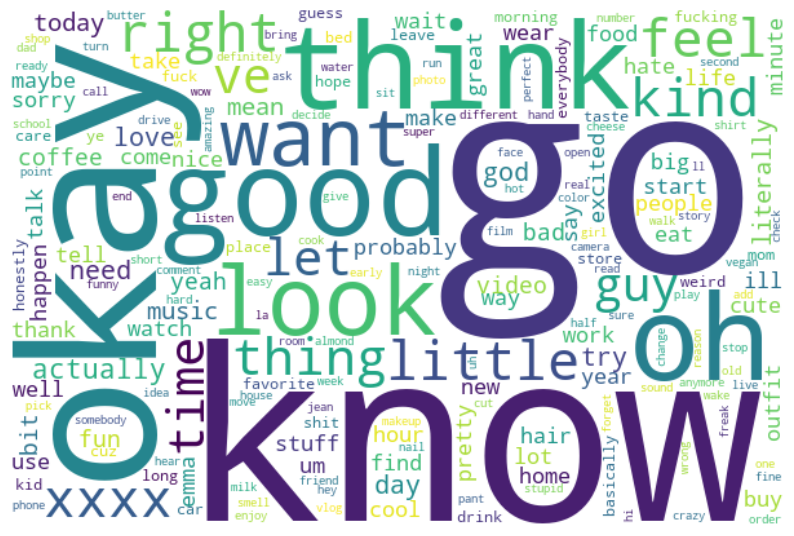

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()